# Practical Lab 3
# Zohair Mubasheer Ahmed
# 8897082

**Lab 3**

This lab provides insight into the concepts of Supervised Learning -Regression algorithms.

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, classification_report
import matplotlib.pyplot as plt

- Loading the Dataset after downloading

In [51]:
creditcard = pd.read_csv('D:/Conestoga/AAA/Assignment 3/creditcard.csv')

- Displaying the dataset

In [52]:
display(creditcard.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Checking for Datatype (Determining if any categorical variables are present)

In [53]:
display(creditcard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

- Determining the Dispersion, Shape and the central tendency of the distribution of the dataset

In [54]:
display(creditcard.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning

- Eliminating the Duplicate rows

In [55]:
print("Duplicate row count", creditcard.duplicated().sum())

Duplicate row count 1081


In [56]:
creditcard.drop_duplicates(inplace=True)

# The index needs ot be rest after eliminating duplicates
creditcard.reset_index(drop=True, inplace=True)

- Checking if the duplicates have been removed

In [57]:
print("Duplicate row count", creditcard.duplicated().sum())

Duplicate row count 0


- Using the Credit Card Fraud Detection Description the Feature 'Class' is the response variable and where 1 stands for fraud and 0 stands for no fraud

In [58]:
print('Non Fraud transaction count',len(creditcard[creditcard.Class == 0]))
print('Fraud transaction count',len(creditcard[creditcard.Class == 1]))

Non Fraud transaction count 283253
Fraud transaction count 473


- For improving the model visualization and fit the amount column is standardized

In [59]:
scaler = StandardScaler()
creditcard['Amount'] = scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
display(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


- Dropping the time column as it is not relevant for our analysis

In [60]:
creditcard = creditcard.drop('Time', axis=1)
X = creditcard.drop('Class',axis=1)
y = creditcard['Class']
display(creditcard)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


## Model Training and Evaluation (Logistic Regression)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

- The training and testing split

In [62]:
display(X_train)
display(y_train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85371,-0.814728,0.296213,2.141400,-1.937931,-0.403318,-0.362528,0.466227,0.014231,1.023169,-1.933296,...,0.102727,0.202544,0.706973,-0.400179,-0.064037,0.758133,-0.590017,0.098159,0.076324,-0.129684
40432,-0.754087,0.220425,2.278073,1.460914,-0.121750,0.824834,-0.480567,0.503645,0.324191,-0.099794,...,-0.029740,0.271328,1.034171,-0.197874,0.062144,-0.229360,-0.070592,0.061022,0.205449,-0.353327
12536,1.031579,0.059022,0.865832,1.254057,-0.483309,-0.056932,-0.367350,0.130718,1.383528,-0.257120,...,-0.191668,-0.122079,-0.245266,0.059869,0.103570,0.208118,-0.533921,0.005393,0.018657,-0.157639
119855,0.140217,1.018953,0.247454,0.836432,0.293988,-0.848915,0.812074,-0.041709,-0.574913,0.417058,...,-0.035888,0.168373,0.607754,0.011910,0.307568,-0.789628,-0.428159,0.427778,0.217058,-0.349773
243845,-1.804388,2.131755,-1.949222,-0.580801,-0.031344,-0.925385,-0.131662,1.082699,0.060121,-0.552890,...,-0.126465,-0.253285,-0.955427,0.296273,0.360831,-0.239627,0.103275,-0.368452,0.073768,-0.313431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,1.221811,-0.622699,0.271691,-0.507132,-1.093817,-1.303639,-0.166317,-0.390254,-1.080318,0.583673,...,0.313441,0.302138,0.641491,-0.168266,0.791311,0.586821,-0.150528,-0.016895,0.032471,0.068200
117583,1.069132,-0.159789,1.913486,2.811710,-0.690517,1.942449,-1.259828,0.577277,1.031453,0.163542,...,-0.115446,0.046602,0.725405,-0.199566,-0.678442,0.552088,0.328766,0.118229,0.029660,-0.353327
73349,-0.891311,0.808612,1.263076,0.522615,1.183978,0.905303,0.565347,0.186910,-1.042086,-0.096321,...,0.078784,0.129436,0.443403,-0.327563,-1.315188,0.647441,-0.057036,-0.014691,0.038455,-0.281681
267336,-0.358224,1.446564,-1.175105,0.075659,2.041475,-1.677117,1.568559,-0.415562,-1.073097,-1.734897,...,0.128571,0.078727,0.333168,-0.350660,0.947248,0.196432,0.700004,0.079430,0.208233,-0.350292


85371     0
40432     0
12536     0
119855    0
243845    0
         ..
21440     0
117583    0
73349     0
267336    0
128037    0
Name: Class, Length: 198608, dtype: int64

- Initializing the Logistic Regression Model

In [63]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

- Making Predictions

In [64]:
y_pred = model.predict(X_test)

- Analyzing the performance metrics of the predictions using the Confusion matrix

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_rep)

Accuracy: 0.9992481026339904
Confusion Matrix:
[[84978    15]
 [   49    76]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.84      0.61      0.70       125

    accuracy                           1.00     85118
   macro avg       0.92      0.80      0.85     85118
weighted avg       1.00      1.00      1.00     85118



The accuracy is quite high (99.92%), however accuracy merely could be inadequate enough for unbalanced datasets as credit card fraud detection, wherein the proportion of legitimate transactions to fraudulent transactions is significantly larger. The model's precision in identifying fraudulent transactions is high (84%), which means the majority of the occasions it is right. There is opportunity for enhancement because the recall is very low (61%), which suggests that the model overlooked some fraudulent transactions. The F1-score gives a more accurate assessment of the model's effectiveness on class 1 by taking into account both accuracy and recall. Its value of 0.70 indicates a decent balance across recall and precision. The confusion matrix provides information about the kinds of errors the model is generating: 15 legitimate transactions were mistakenly labelled as fraudulent (false positives) whereas 49 fraudulent transactions were mistakenly classed as legitimate (false negatives).


**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 


In [66]:
insurance = pd.read_csv('D:/Conestoga/AAA/Assignment 3/insurance.csv')

- Displaying the Dataset

In [67]:
display(insurance.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Checking for Datatype (Determining if any categorical variables are present)

In [68]:
display(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

- Determining the Dispersion, Shape and the central tendency of the distribution of the dataset

In [69]:
# No null values as shown above
categorical_columns = ['sex', 'smoker', 'region']
# Now changing catergorical variables into numeric variables
label_encoder = LabelEncoder()
for cat_col in categorical_columns:
    insurance[cat_col] = label_encoder.fit_transform(insurance[cat_col])

display(insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Data Cleaning

- Eliminating the Duplicate rows

In [70]:
print("Duplicate row count:", insurance.duplicated().sum())

# Remove duplicate rows
insurance.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
insurance.reset_index(drop=True, inplace=True)

Duplicate row count: 1


- Checking if the duplicates have been removed

In [71]:
print("Number of duplicate rows:", insurance.duplicated().sum())

Number of duplicate rows: 0


- Dropping the charges column

In [72]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

- Splitting the Dataset into Training and Testing

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

## Model Training and Evaluation (Linear Regression)

- Initializing the model

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Making the Prediction

In [75]:
y_pred = model.predict(X_test)

- Evaluating the predictions from the model using performance metrics

In [76]:
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared (R2) Score: {r2_score(y_test, y_pred)}")

Mean Squared Error (MSE): 37399568.3879263
Root Mean Squared Error (RMSE): 6115.518652406049
Mean Absolute Error (MAE): 4243.924502473798
R-squared (R2) Score: 0.7381812839196416


## Analyzing the Outcomes

- Mean Squared Error (MSE): The MSE calculates the average squared variation that exists between the predicted and actual costs of insurance. A lower MSE score means that the model's forecasts are more in line with reality.

- Root Mean Squared Error (RMSE): The square root of the MSE is the RMSE. By providing us the error in the identical measurement as the target variable, it gives us a measure that is easier to understand. The RMSE in this instance is around 6239.81, which indicates that the model's estimates of the expense of insurance were, on average, incorrect by about $6115.51.

- Mean Absolute Error (MAE): The mean absolute difference between the anticipated and actual expenses of insurance is measured by the MAE. It offers a sense of how distant the projections are from the actual values, similar to the RMSE. The MAE is around $4243.92, which indicates that there is a $4243.92 average absolute variation between the projected and actual insurance prices.


- R-squared (R2) Score: The R-squared score, which ranges from 0 to 1, indicates the percentage of the variation in the target variable (insurance costs) that the model is able to account for. The R-squared value in this instance is around 0.73, which indicates that the model accounts for about 73% of the variation in insurance prices. A higher R-squared value suggests that the model fits the data more accurately.


In summary, the R-squared result suggests that the model has some predictive ability. The relatively high RMSE and MAE, however, indicate that there is potential for improving in terms of more precise insurance cost predictions. The predictions may be improved by feature engineering, employing more complex regression models, or investigating different machine learning methods.

- Displaying the results Graphically

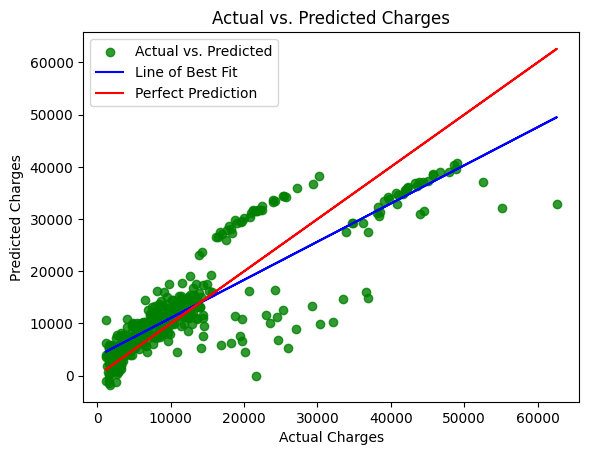

In [80]:
plt.scatter(y_test, y_pred, alpha=0.8, color='g', label='Actual vs. Predicted')
fit_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(fit_line, y_test), color='b', label='Line of Best Fit')
plt.plot(y_test, y_test, color='r', linestyle='-', label='Perfect Prediction')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()


**Notes:**

This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.